In [ ]:
from utils.black_scholes import *
from utils.calibrator import *
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
vr = 0.13
sr = np.linspace(-1, 1, 100)
pc = np.linspace(0.05, 15, 120)
cc = np.linspace(0.05, 15, 120)
pdlist = []
for i in sr:
    for j in pc:
        for k in cc:
            pdlist.append([vr, i, j, k])


In [3]:
wing_sim_args = pd.DataFrame(pdlist, columns=['vr_', 'sr_', 'pc_', 'cc_'])
wing_sim_args


,vr_,sr_,pc_,cc_
0,0.13,-1.0,0.05,0.050000
1,0.13,-1.0,0.05,0.175630
2,0.13,-1.0,0.05,0.301261
3,0.13,-1.0,0.05,0.426891
4,0.13,-1.0,0.05,0.552521
...,...,...,...,...
1439995,0.13,1.0,15.00,14.497479
1439996,0.13,1.0,15.00,14.623109
1439997,0.13,1.0,15.00,14.748739
1439998,0.13,1.0,15.00,14.874370


In [4]:
def wing_model_test_1(vr, sr, pc, cc):
    vollist = []
    for i in np.linspace(-0.3, 0.3, 50):
        vollist.append(wing_model(i,vr, sr, pc, cc, -0.3, 0.3, 0.5, 0.5))
    return min(vollist) > 0

def wing_model_test_2(vr, sr, pc, cc):
    _, glist = wing_model_durrleman_condition(vr, sr, pc, cc, -0.3, 0.3, 0.5, 0.5)
    return min(glist) > 0


In [5]:
wing_sim_args.insert(wing_sim_args.shape[1], 'wing_model_test_1', wing_sim_args.apply(lambda x: wing_model_test_1(x['vr_'], x['sr_'], x['pc_'], x['cc_']), axis=1))
wing_sim_args.insert(wing_sim_args.shape[1], 'wing_model_test_2', wing_sim_args.apply(lambda x: wing_model_test_2(x['vr_'], x['sr_'], x['pc_'], x['cc_']), axis=1))
wing_sim_args.insert(wing_sim_args.shape[1], 'wing_model_combined_test', wing_sim_args.apply(lambda x: x['wing_model_test_1'] and x['wing_model_test_2'], axis=1))
wing_sim_args.to_csv("wing_sim_args.csv", index=False)


In [6]:
wing_sim_args_true = wing_sim_args[wing_sim_args['wing_model_combined_test']]
wing_sim_args_true


,vr_,sr_,pc_,cc_,wing_model_test_1,wing_model_test_2,wing_model_combined_test
58813,0.13,-0.919192,1.306303,1.683193,True,True,True
58814,0.13,-0.919192,1.306303,1.808824,True,True,True
58815,0.13,-0.919192,1.306303,1.934454,True,True,True
58816,0.13,-0.919192,1.306303,2.060084,True,True,True
58817,0.13,-0.919192,1.306303,2.185714,True,True,True
...,...,...,...,...,...,...,...
1377014,0.13,0.919192,9.472269,1.808824,True,True,True
1377015,0.13,0.919192,9.472269,1.934454,True,True,True
1377016,0.13,0.919192,9.472269,2.060084,True,True,True
1377017,0.13,0.919192,9.472269,2.185714,True,True,True


In [7]:
print(wing_sim_args.cc_.max(), wing_sim_args_true.cc_.max())
print(wing_sim_args.pc_.max(), wing_sim_args_true.pc_.max())
print(wing_sim_args.sr_.max(), wing_sim_args_true.sr_.max())

# vr = 0.001
# 15.0 0.803781512605042
# 15.0 0.803781512605042
# 1.0 0.05050505050505061

# vr = 0.01
# 15.0 2.311344537815126
# 15.0 2.311344537815126
# 1.0 0.2525252525252526

# vr = 0.02
# 15.0 3.442016806722689
# 15.0 3.442016806722689
# 1.0 0.3737373737373739

# vr = 0.03
# 15.0 4.321428571428571
# 15.0 4.321428571428571
# 1.0 0.4343434343434345

# vr = 0.04
# 15.0 5.075210084033613
# 15.0 5.075210084033613
# 1.0 0.5151515151515154

# vr = 0.05
# 15.0 5.703361344537815
# 15.0 5.703361344537815
# 1.0 0.5555555555555556

# vr = 0.06
# 15.0 6.3315126050420165
# 15.0 6.3315126050420165
# 1.0 0.6161616161616164

# vr = 0.07
# 15.0 6.834033613445378
# 15.0 6.834033613445378
# 1.0 0.6767676767676769

# vr = 0.08
# 15.0 7.336554621848739
# 15.0 7.336554621848739
# 1.0 0.7171717171717173

# vr = 0.09
# 15.0 7.8390756302521005
# 15.0 7.8390756302521005
# 1.0 0.7575757575757578

# vr = 0.10
# 15.0 8.215966386554623
# 15.0 8.215966386554623
# 1.0 0.7979797979797982

# vr = 0.11
# 15.0 8.718487394957984
# 15.0 8.718487394957984
# 1.0 0.8383838383838385

# vr = 0.12
# 15.0 9.095378151260505
# 15.0 9.095378151260505
# 1.0 0.8787878787878789

# vr = 0.13
# 15.0 9.472268907563025
# 15.0 9.472268907563025
# 1.0 0.9191919191919193

# vr = 0.14
# 15.0 9.849159663865546
# 15.0 9.849159663865546
# 1.0 0.9595959595959598

# vr = 0.15
# 


15.0 9.472268907563025
15.0 9.472268907563025
1.0 0.9191919191919193


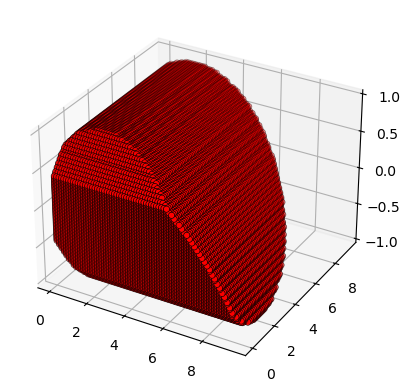

In [8]:
ax = plt.subplot(projection='3d')
# ax.scatter(wing_sim_args['cc_'], wing_sim_args['pc_'], wing_sim_args['sr_'], c=wing_sim_args['wing_model_combined_test'], cmap='coolwarm',edgecolors='black', linewidths=0.5)
ax.scatter(wing_sim_args_true['cc_'], wing_sim_args_true['pc_'], wing_sim_args_true['sr_'], c='red',edgecolors='black', linewidths=0.5)
plt.show()


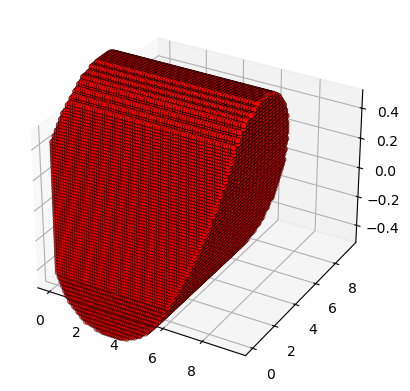

In [9]:
ax = plt.subplot(projection='3d')
# ax.scatter(wing_sim_args['cc_'], wing_sim_args['pc_'], wing_sim_args['sr_'], c=wing_sim_args['wing_model_combined_test'], cmap='coolwarm',edgecolors='black', linewidths=0.5)
ax.scatter(wing_sim_args_true['pc_'], wing_sim_args_true['cc_'], wing_sim_args_true['sr_'], c='red',edgecolors='black', linewidths=0.5) # , c=wing_sim_args['wing_model_combined_test']
ax.set_zlim(-0.5, 0.5)
plt.show()


In [10]:
# b = a.pivot_table(index='cc_', columns='pc_', values='sr_')
# b


In [11]:
# ax = plt.subplot(projection='3d')
# # ax.scatter(wing_sim_args['cc_'], wing_sim_args['pc_'], wing_sim_args['sr_'], c=wing_sim_args['wing_model_combined_test'], cmap='coolwarm',edgecolors='black', linewidths=0.5)
# ax.scatter(c['cc_'], c['pc_'], c['sr_'], c='red', edgecolors='black', linewidths=0.5)
# plt.show()
